# Prompt 1: Visualize statistics of your data

Build useful visualizations of the statistics of your data. How many images or videos do you have? What distribution of categories of interest exist in your data? When was the data collected? Are there multiple types or modalities of data?

First import useful packages

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

# every time these files change, you need to restart the notebook kernel
# Hit the circle arrow Restart button in the toolbar
from metadata import Metadata 
import plotting

#import cv2
import matplotlib.patches as patches

ModuleNotFoundError: No module named 'metadata'

In [2]:
PATH = "../../../"

In [3]:
JSON_PATH = PATH + "Data/JSONs/" + 'dataset_caltech_coco.json'

In [5]:
metadata = Metadata(JSON_PATH)

In [6]:
metadata.show()

High-level statistics:

Images: 25315
Categories: 15
Annotations: 33658
Animal images: 22310
Empty images: 3005
Locations: 69
Sequences: 13272


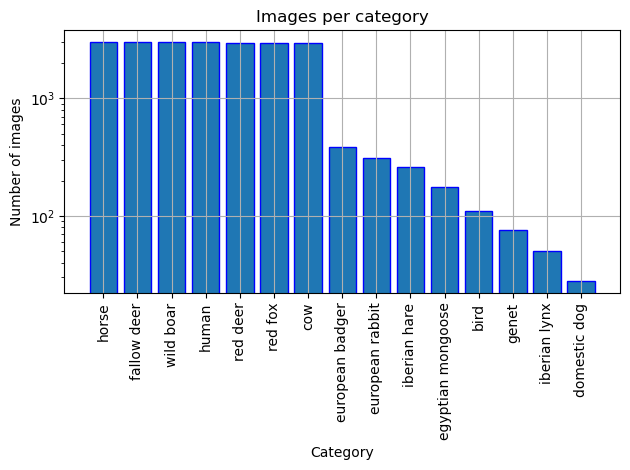

In [7]:
plotting.plot_images_per_category_sorted(metadata)

<Figure size 1200x600 with 0 Axes>

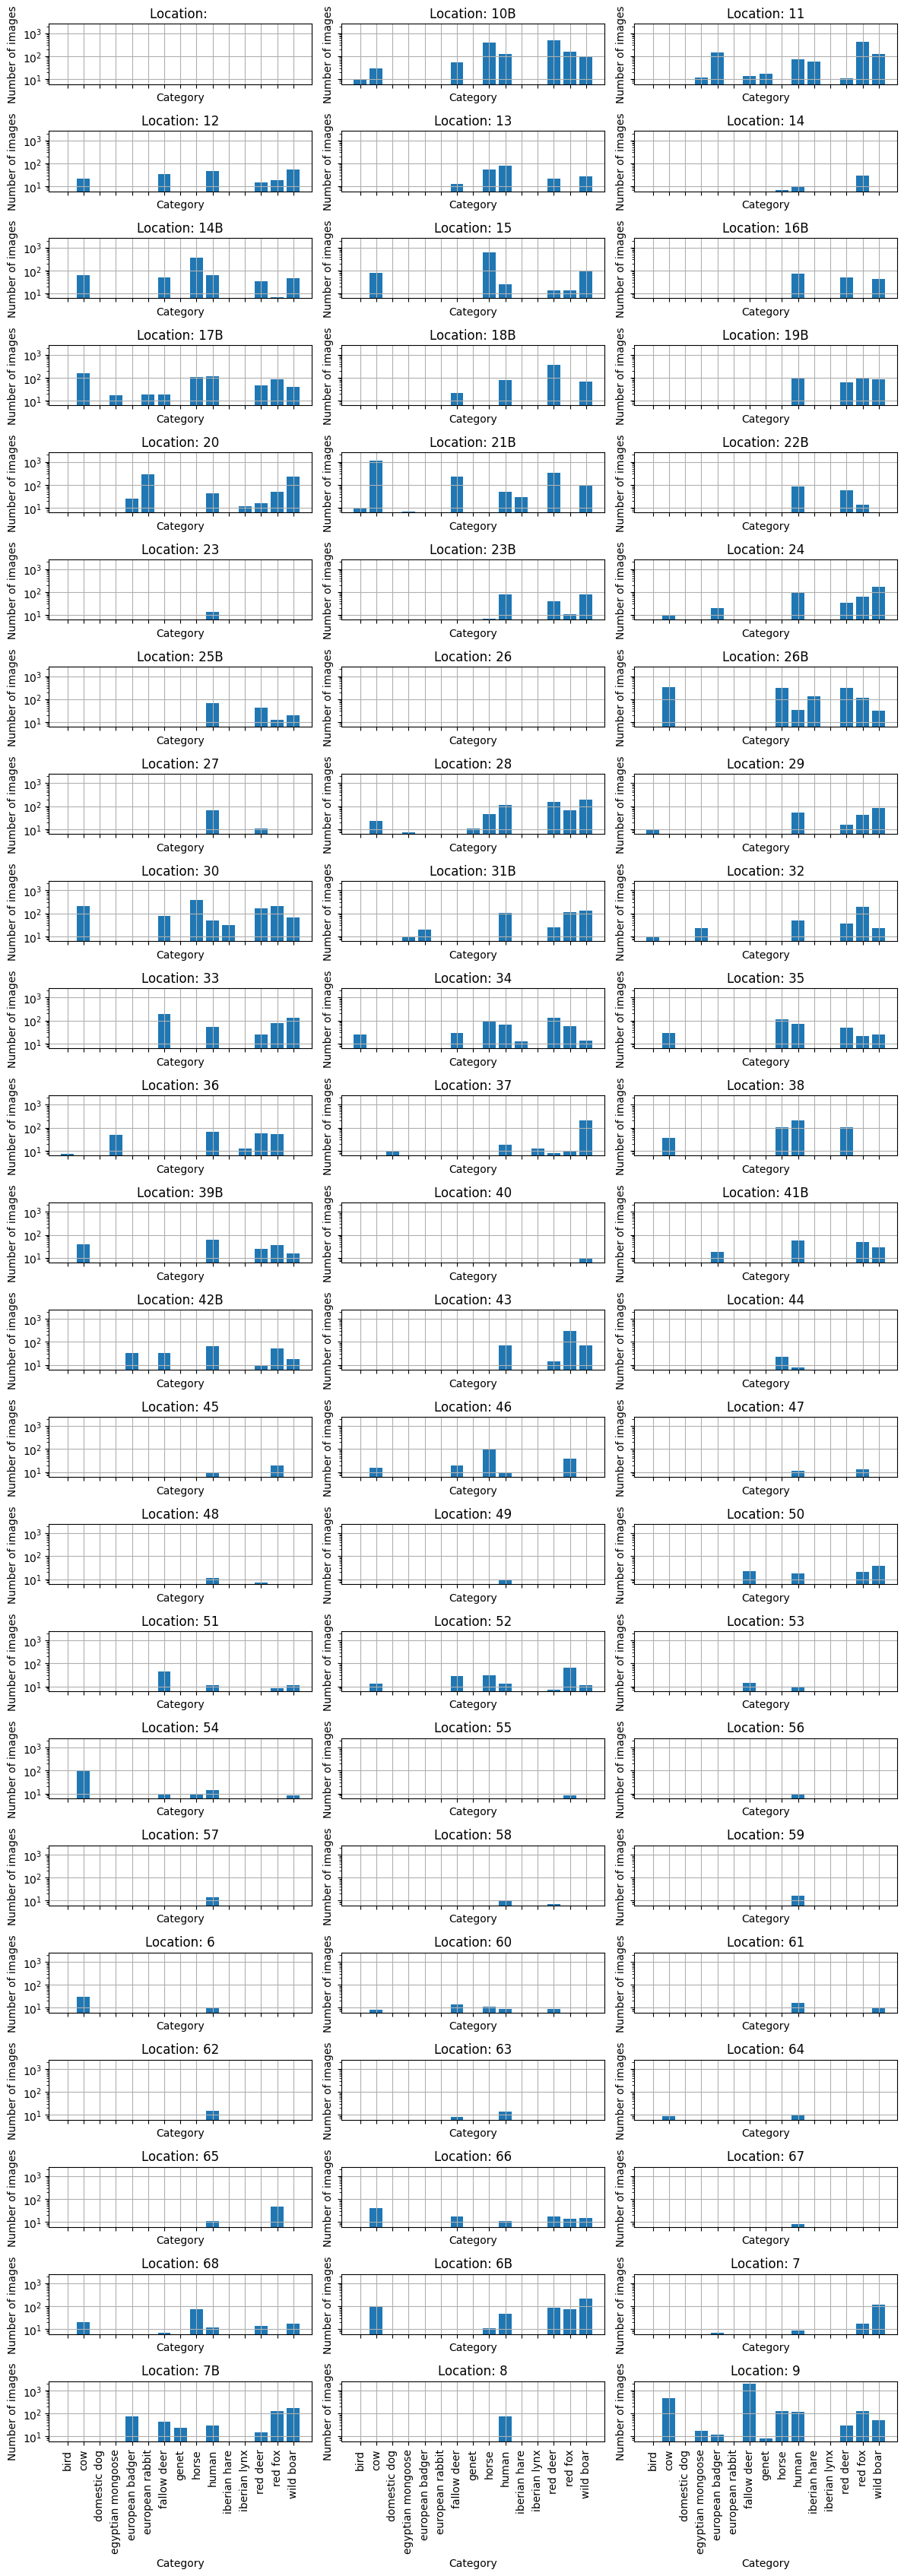

In [ ]:
plotting.plot_images_per_category_per_location(metadata)

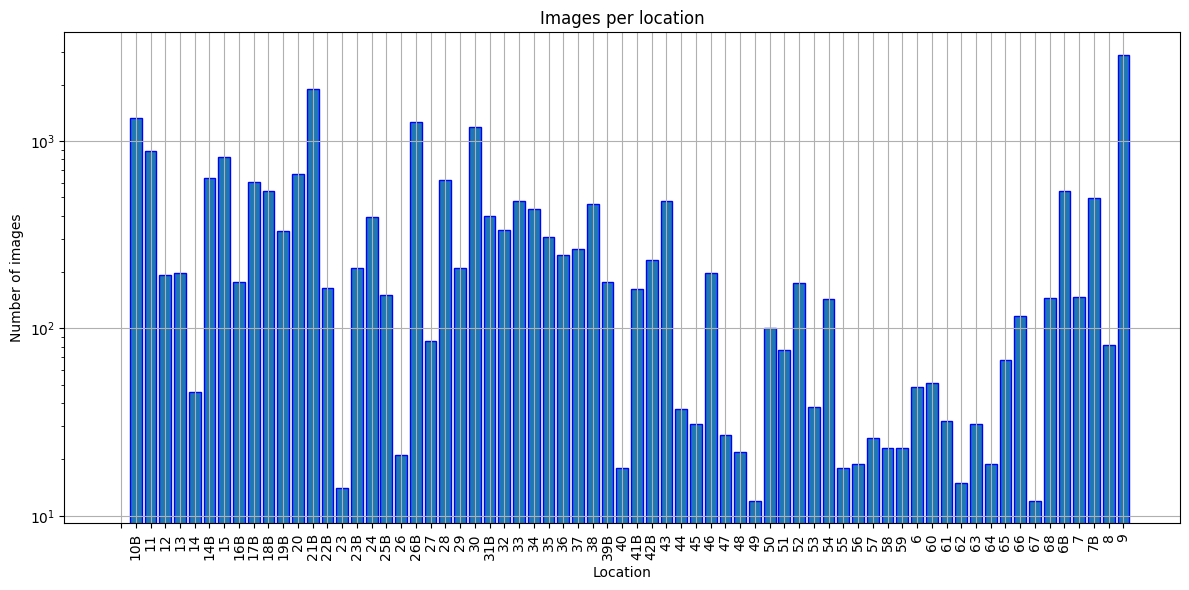

In [ ]:
plotting.plot_images_per_location(metadata)

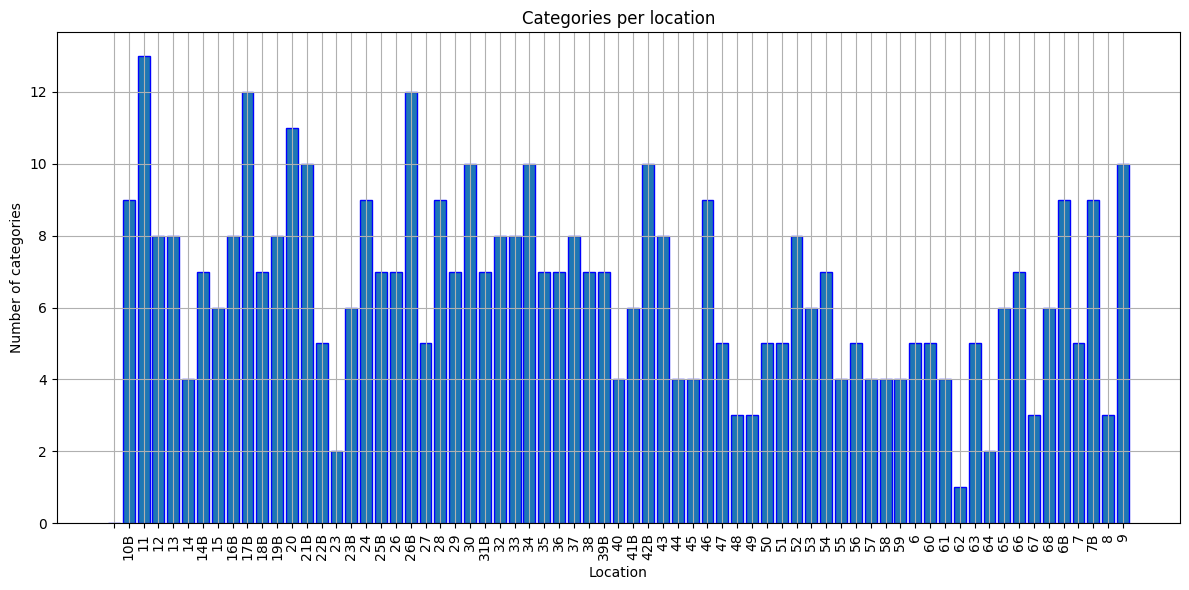

In [ ]:
plotting.plot_categories_per_location(metadata)

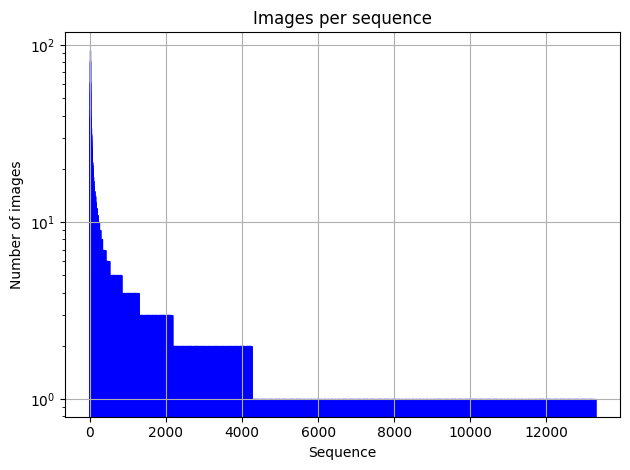

In [ ]:
plotting.plot_images_per_sequence(metadata)

In [ ]:
# Continuamos con el código para contar el número de secuencias vacías y no vacías
print("Sequence number: " + str(len(metadata.sequences)))

images_per_sequence = {seq: [] for seq in metadata.sequences}
for im in metadata.images:
    images_per_sequence[im['seq_id']].append(im['id'])

empty_sequences = []
non_empty_sequences = []
for seq in metadata.sequences:
    seq_categories = [metadata.im_to_cat[im] for im in images_per_sequence[seq] if im in metadata.im_to_cat]
    if all([cat == 4 for cat in seq_categories]):
        empty_sequences.append(seq)
    else:
        non_empty_sequences.append(seq)

print("Empty sequences: " + str(len(empty_sequences)))
print("Non Empty sequences: " + str(len(non_empty_sequences)))


Sequence number: 13272
Empty sequences: 2865
Non Empty sequences: 10407


Load detection results from the MegaDetector (precomputed for the competition)

In [ ]:
with open(PATH + "Data/JSONs/" + 'dataset_caltech_coco.json') as f:
    detections = json.load(f)

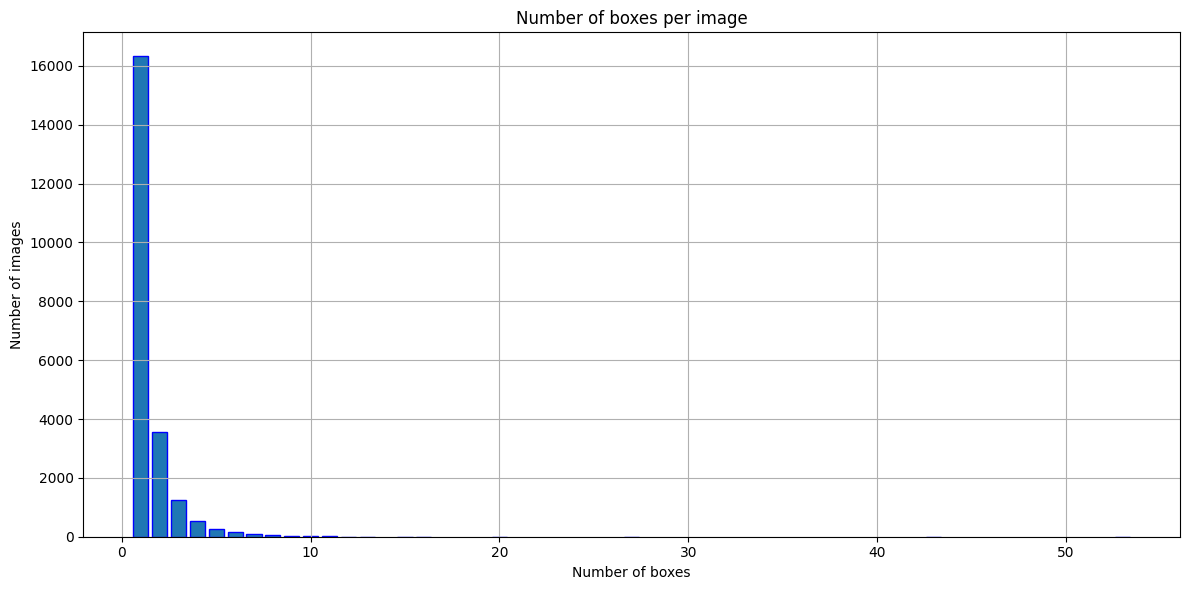

In [ ]:
plotting.plot_boxes_per_image(detections, metadata)

# Load one of your images or videos and visualize it

In [ ]:
def show_image_with_annotations(image_path, annotation_file):
    # Load the COCO annotation file
    with open(annotation_file) as f:
        data = json.load(f)

    # Load the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    file_name = image_path.split("Dataset/")[-1].split("/")[2]

    # Get annotations for the image
    image_id = None
    annotations = []
    for img in data['images']:
        if img['file_name'] == file_name:
            image_id = img['id']
            break
    for ann in data['annotations']:
        if ann['image_id'] == image_id:
            annotations.append(ann)

    # Create a figure and axes
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Get unique category ids in the annotations
    unique_categories = set(ann['category_id'] for ann in annotations)

    # Define a colormap for different categories
    colors = plt.cm.get_cmap('tab20', len(unique_categories))

    # Plot bounding boxes for each annotation
    for ann in annotations:
        category_id = ann['category_id']
        bbox = ann['bbox']
        x, y, w, h = bbox
        x *= image.shape[1]  # Scale x-coordinate by image width
        y *= image.shape[0]  # Scale y-coordinate by image height
        w *= image.shape[1]  # Scale width by image width
        h *= image.shape[0]  # Scale height by image height
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor=colors(category_id), facecolor='none')
        ax.add_patch(rect)

        # Get the category name
        category_name = [cat['name'] for cat in data['categories'] if cat['id'] == category_id][0]

        # Add the category name above the bounding box with the same color
        plt.text(x, y - 2, category_name, color=colors(category_id), fontsize=12, backgroundcolor='white')

    # Show the image with bounding boxes
    plt.axis('off')
    plt.show()

In [ ]:
image_path = PATH + 'Dataset/' + "rev24/74/74_20230317 (1265).JPG"
annotation_file = JSON_PATH

In [ ]:
# image_path.split("Dataset/")[-1]
#image_path.split("Dataset/")[-1].split("/")[2]

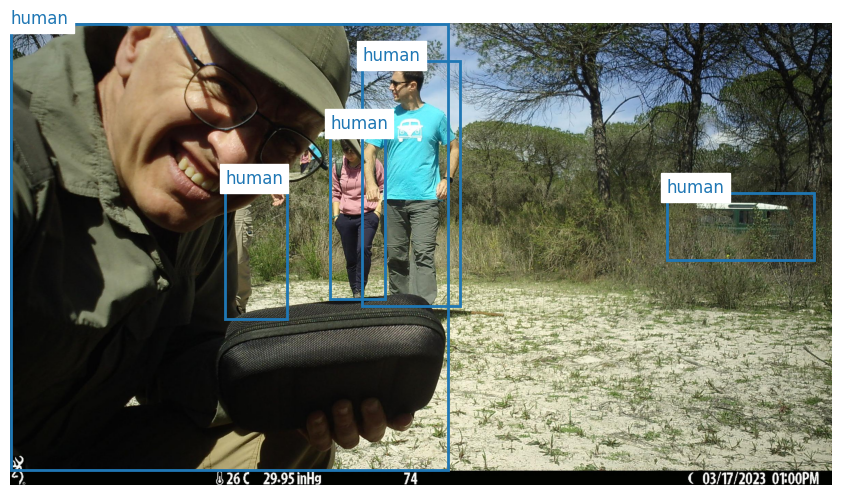

In [ ]:
show_image_with_annotations(image_path, annotation_file)